
# STUDY OF ANGULAR MOMENTUM OF A PERTURBER IN A ROTATING PLUMMER DISTRIBUTION

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema
import pandas as pd
import astropy
import astropy.units as u
from tqdm import tqdm
import os
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import pandas as pd
#import seaborn as sns
import scipy.integrate as integrate
import glob
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import matplotlib.image as mpimg

## <img src="ex.gif" align="right" width="550px"/>

## Introducion
The **plummer sphere** is a specific model model used to describe the mass distribution and density of spherical stellar clusters, such as globular clusters or spheroidal galaxies.



It feautures the following **density profile**:

$$\rho(r)=\frac{M_{TOT}}{\frac{4}{3}\pi r^3}\frac{1}{(1+\frac{r^2}{b^2})^\frac{5}{2}}$$

where \( $M_{TOT}$ \) is the total mass of the sphere and \( b \) is the scale radius.

By integrating this quantity from $0 \to r$, we get the **mass profile** as:

$$M(r) = \frac{r^3 M_{tot}}{b^3} \frac{1}{(1 + r^2/b^2)^{3/2}}$$



## Different configurations 



This work focuses on the study of angular momentum in different configurations. The first step involved generating a distribution for a Plummer sphere.


After generating the Plummer sphere distribution, I imposed a positive angular momentum on each individual particle. The next step involved introducing a perturbing mass, referred to as a "perturber" and assigning it a positive velocity in the y-direction.

1. **Standard Plummer Sphere**: Here, the perturber's velocity was alligned along y, set to $V_y = \sqrt{\frac{GM}{r}}$.
  
2. **Co-rotating Case**: Similar to the standard case, the perturber's velocity was also positive $V_y = \sqrt{\frac{GM}{r}}$, but in a configuration where the background system was already rotating in the same direction as the perturber.

3. **Counter-rotating Case**: In contrast, I assigned a negative velocity $V_y = -\sqrt{\frac{GM}{r}}$ to the perturber, which opposes the system's rotation, creating a counter-rotating scenario.

These different configurations allowed for an in-depth examination of the effects of angular momentum and perturbations on the dynamics of the Plummer sphere, revealing how rotational properties influence the system's stability and evolution.


# Purpose of my analysis

This study concerns the study of the dynamical friction on a massive perturber; more in particular i wanted to study the evolution of the angular momentum of a perturber within a plummer destribution in the 3 configurations explained before. 
Moreover, to deeply study this process, i set different initial condition on the system and on the perturber. 
those are the simulations i was focused on:

Simulation 1:
- N:10000
- X_perturber=0.8 scale radius
- M_perturber=0.1 $M$

Simulation 2:
- N:10000
- X_perturber= 1 scale radius
- M_perturber=0.1 $M$

Simulation 3:
- N:20000
- X_perturber= 1 scale radius
- M_perturber=0.1 $M$

Simulation 4:
- N:30000
- X_perturber= 1 scale radius
- M_perturber=0.1 $M$

More in particular, for all the simulations I made a compirison between the 3 configurations (standard plummer, co-rotating, counter-rotating)

# PROCEDURE: All the steps 

here i will explain the 4 steps i made in my analysis:
- **generation of the distribution**
- **defining the parameters of the perturber**
- **setting the parameter of the  simulation**
- **data analysis**

in particular just as an example I ran a simulation with 10000 particles, the starting opint of the perturber is set to coordinates [1 scale radius, 0,0] and the mass of the perturber is 0.1 of the mass contained in a sphere of radius= 1 scale radius

# STEP 1: generation of the distribution 

## coordinates distribution

In [65]:
N = 10000  #number of particles
b = 10
M_tot = 1
m = M_tot/N * np.ones(N) # define the array of masses
G = 1

following the formulae above

In [66]:
def Plummer_density(r):
    return 3*M_tot/(4*np.pi*b**3) / (1+r**2/b**2)**(5/2) 

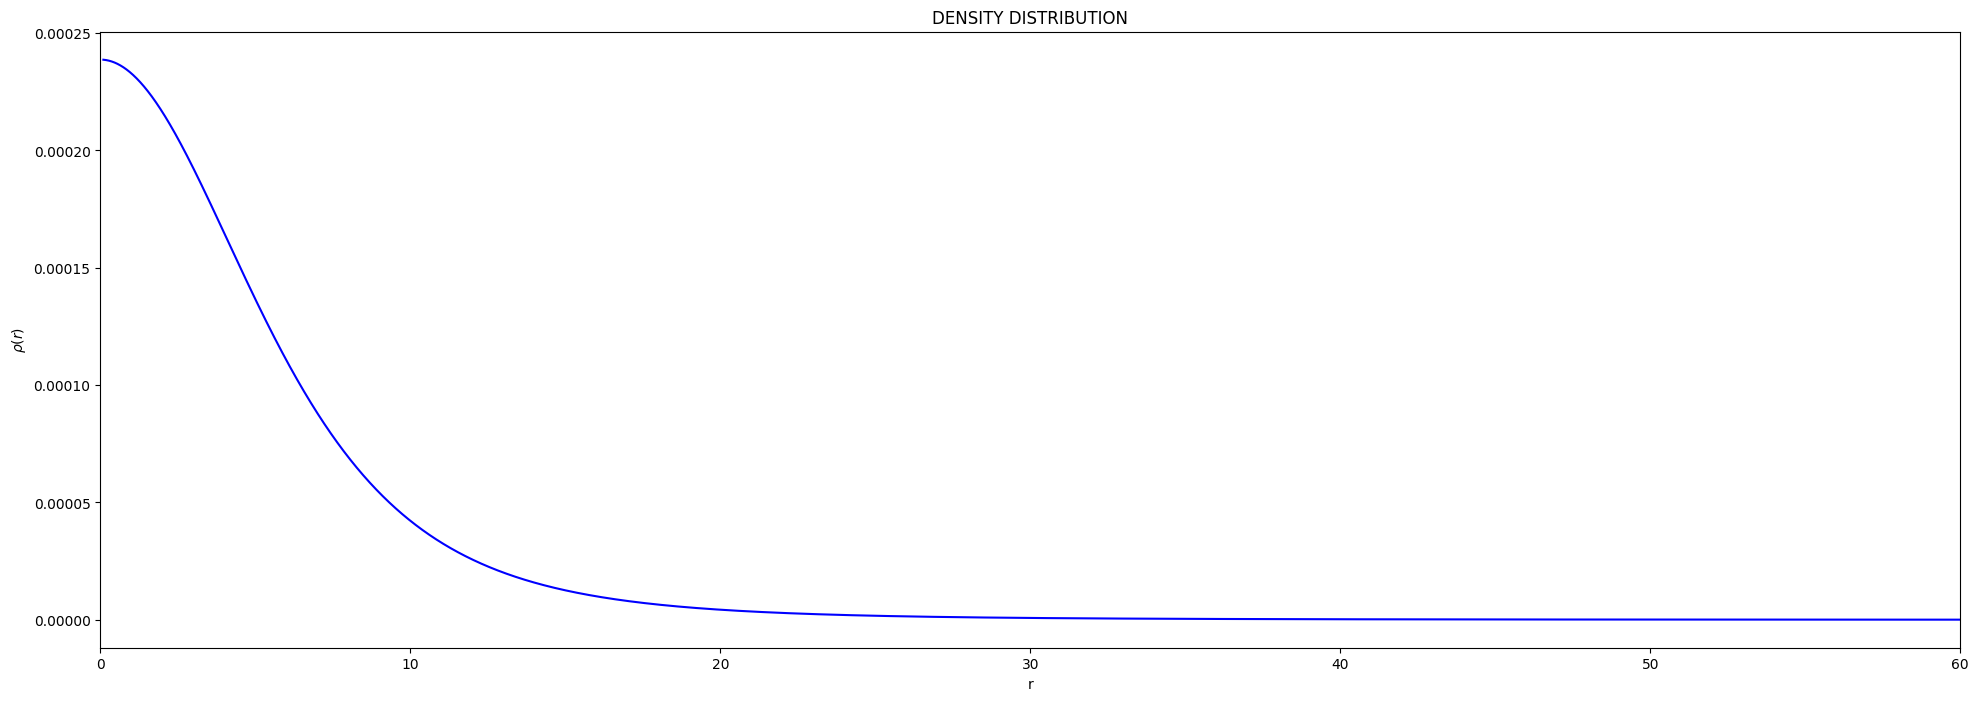

In [138]:
#I plot the theoretical density distribution
radii= np.linspace(0.1, 10*b, N)
rho_ = Plummer_density(radii)
fig,ax = plt.subplots(figsize=(24,8))
ax.set_xlim(0, 6*b)
ax.set_title(r'DENSITY DISTRIBUTION')
ax.set_xlabel('r')
ax.set_ylabel(r'$\rho(r)$')
ax.plot(radii, rho_,color='blue')

In [68]:
#radial distribution
np.random.seed(420)
P_r = np.random.uniform(0,1,N) # uniform distribution 
Radius = b*np.sqrt(P_r**(2/3)/(1-P_r**(2/3))) # sample R(P) 

#theta distribution 
P_theta = np.random.uniform(0,1,N) 
Theta = np.arccos(1-2*P_theta) #produce una distribuzione uniforme di punti su una sfera

#azimuthal distribution
P_phi = np.random.uniform(0,2*np.pi,N) #uniform from 0 to 2pi
Phi = P_phi

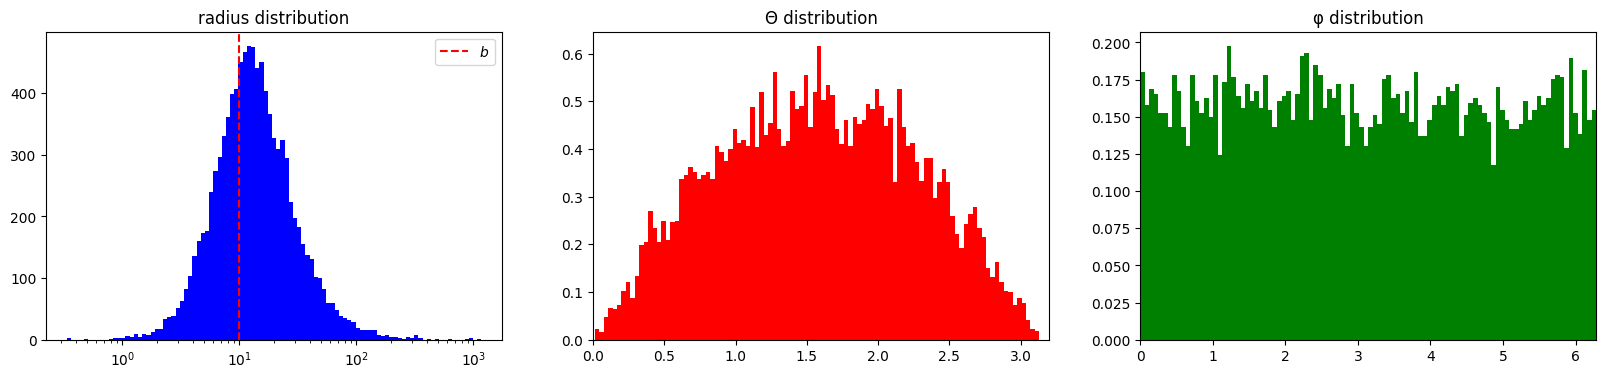

In [69]:
#I plot the spherical coordinates
fig, axes = plt.subplots(1, 3, figsize=(20, 4))

axes[0].hist(Radius, bins=np.logspace(np.log10(np.min(Radius)), np.log10(np.max(Radius)), 100), color='blue')
axes[0].axvline(x=b, linestyle='--', color='red', label=r'$b$')
axes[0].set_title('radius distribution')
axes[0].set_xscale('log')
axes[0].legend()

axes[1].hist(Theta, bins=100, density=True, color='red')
axes[1].set_title("Θ distribution")
axes[1].set_xlim(0,3.2)

axes[2].hist(Phi, bins=100, density=True, color='green')
axes[2].set_title("φ distribution")
axes[2].set_xlim(0,2*np.pi);

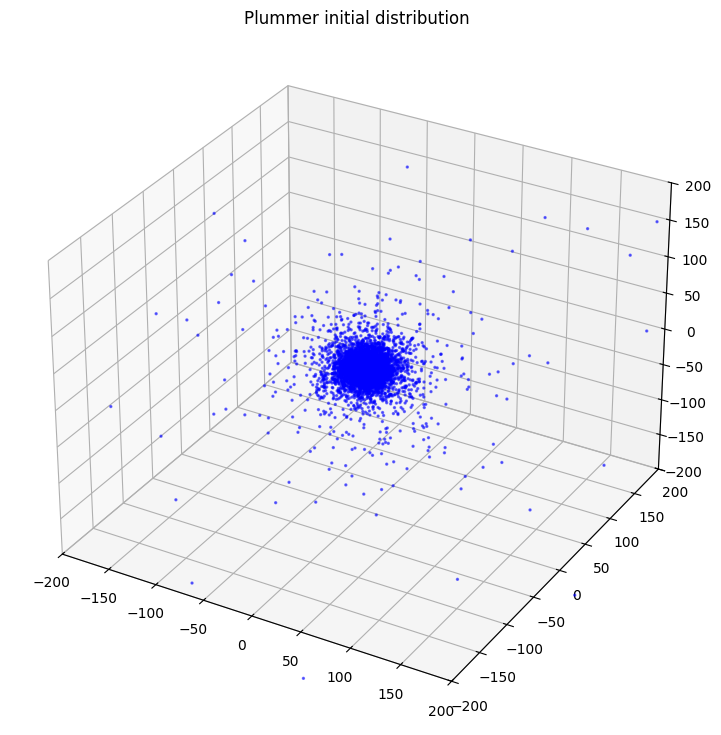

In [70]:
#I transform the pherical coordinates into cartesian coordinates

x = np.array(Radius * np.sin(Theta) * np.cos(Phi))
y = np.array(Radius * np.sin(Theta) * np.sin(Phi))
z = np.array(Radius * np.cos(Theta))
#plot of the distribution
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z, s=2, alpha = 0.5, c = 'blue')
ax.set_title('Plummer initial distribution')
ax.set_xlim(-20*b,20*b)
ax.set_ylim(-20*b,20*b)
ax.set_zlim(-20*b,20*b);


## velocity distribution


To sample from the velocity distribution, standard methods of inverting the following integral $ \int f \, d^{3}v$ to obtain the cumulative function are not applicable. Instead, we employ the Monte Carlo rejection method to sample the escape velocity **ratio**, $ q = \frac{v}{\sqrt{2\Psi}}$, which is then used to determine the magnitude of the velocities.
 
Once we have sampled $q$, we can easily convert it into $v$ as $v = q \cdot \sqrt{2 \Phi}$

with $\Phi$ the potential at given radius, $\sqrt{2 \Phi}$ the $\textit{escape velocity}$, and $q < 1$, which means that $v < v_{esc}$.



What we get at the end is:

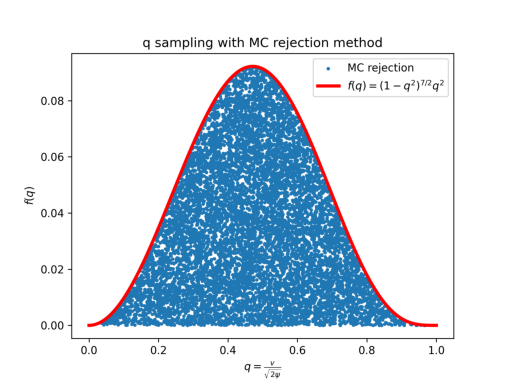

In [71]:
img = mpimg.imread('immagini/velocity.png')
plt.imshow(img)
plt.axis('off')  # Nasconde gli assi
plt.show()

## I verify that the densities at various radii correspond to theoretical predictions

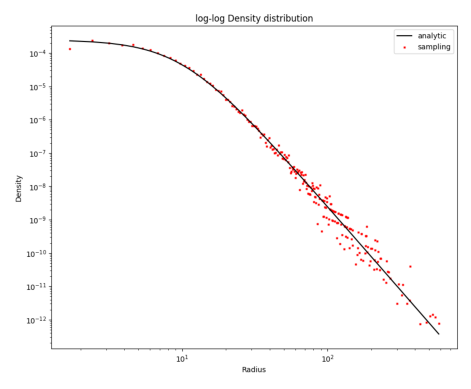

In [72]:
img = mpimg.imread('immagini/density.png')
plt.imshow(img)
plt.axis('off')  # Nasconde gli assi
plt.show()

## Run simulation of plummer only

<img src="immagini/noperturber/iso.gif" align="center" width="550px"/>


# STEP 2: defining the parameters of the perturber 

**STANDARD**

In [73]:
#mass contaned within a given radius
def M_of_r(r):
    return M_tot*r**3 /(b**3 * (1+r**2/(b**2))**(3/2))


In [74]:
X_BH = 10
M_perturber = 0.1*M_of_r(X_BH)

#space-coordinates
x_perturber = X_BH
y_perturber = 0
z_perturber = 0

#velocity-coordinates
v_BH=np.sqrt(G*M_of_r(X_BH)/x_perturber)

Vx_perturber = 0
Vy_perturber = v_BH
Vz_perturber = 0

**CO-ROTATING**

In [75]:
X_BH = 10 
M_perturber = 0.1*M_of_r(X_BH)

#space-coordinates
x_perturber = X_BH
y_perturber = 0
z_perturber = 0

#velocity-coordinates
v_BH=np.sqrt(G*M_of_r(X_BH)/x_perturber)

Vx_perturber = 0
Vy_perturber = v_BH
Vz_perturber = 0

**COUNTER-ROTATING**

In [76]:
X_BH = 10 
M_perturber = 0.1*M_of_r(X_BH)

#space-coordinates
x_perturber = X_BH
y_perturber = 0
z_perturber = 0

#velocity-coordinates
v_BH= -np.sqrt(G*M_of_r(X_BH)/x_perturber)

Vx_perturber = 0
Vy_perturber = v_BH
Vz_perturber = 0

# STEP 3: setting the parameter of the  simulation 

In [77]:
rho_b = (Plummer_density(b)) # to compute the dynamical time

# initialize treecode parameters

theta_tc = 0.1
T_dyn = np.sqrt((3*np.pi)/(16*rho_b))
t_stop = 10*T_dyn
t_step = 0.01*T_dyn

V = 4/3 * np.pi * b**3
epsilon = round(1/10 * (V/N)**(1/3), 4)

print('theta = ',theta_tc)
print('t_step = ',t_step)
print('t_stop = ',t_stop)
print('epsilon = ',epsilon)
print('dyn time = ', T_dyn)

#after this i ran the simulation and read the data 

theta =  0.1
t_step =  1.1814283050307268
t_stop =  1181.4283050307267
epsilon =  0.0748
dyn time =  118.14283050307267


# STEP 4: data analysis

first of all I calculated the **center of mass** of the plummer at every istant of time by appling


$x_{cm} = \frac{\sum_{i=1}^{n} m_i \cdot x_i}{\sum_{i=1}^{n} m_i}$

$
y_{cm} = \frac{\sum_{i=1}^{n} m_i \cdot y_i}{\sum_{i=1}^{n} m_i}$


$z_{cm} = \frac{\sum_{i=1}^{n} m_i \cdot z_i}{\sum_{i=1}^{n} m_i}$

**radial evolution of the center of mass of the destribution**

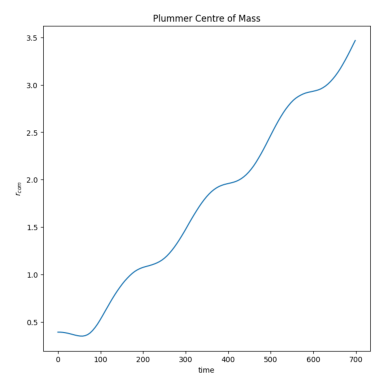

In [78]:
img = mpimg.imread('immagini/cdm.png')
plt.imshow(img)
plt.axis('off')  
plt.show()

**coordinates evolution of the center of mass of the destribution**

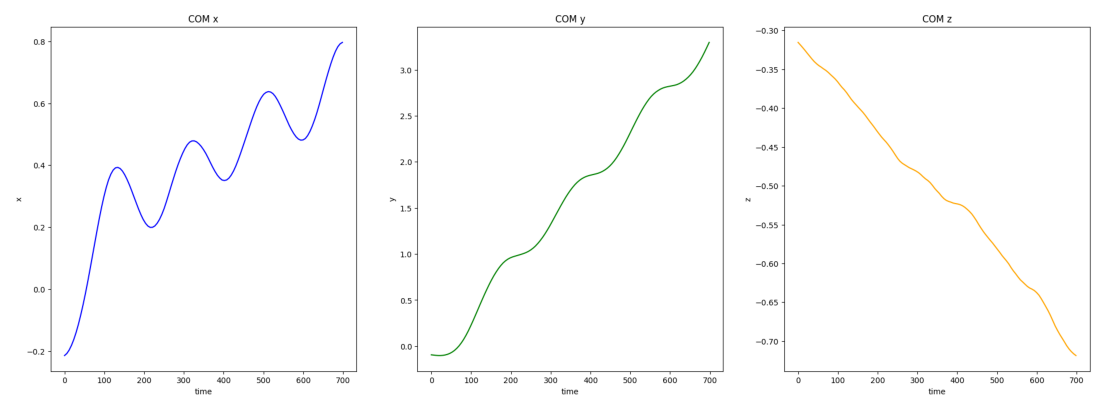

In [79]:
img = mpimg.imread('immagini/coordinates.png')
plt.figure(figsize=(14, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

then i calculated the new coordinates of the particles with respect of the center of mass of the destribution, by applying:


$x_{new}=x_{sim}-x_{cm}$

$y_{new}=y_{sim}-y_{cm}$

$z_{new}=z_{sim}-z_{cm}$

\
where $x_{sim}$, $y_{sim}$ and $z_{sim}$ are the coordinates of the particles calculated by the treecode

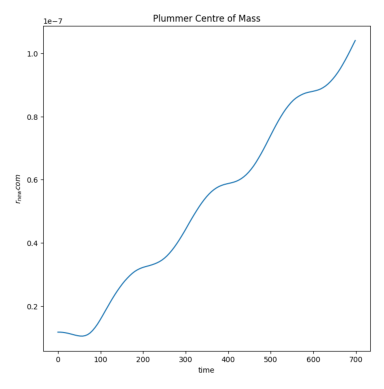

In [80]:
img = mpimg.imread('immagini/r_new.png')
plt.imshow(img)
plt.axis('off') 
plt.show()

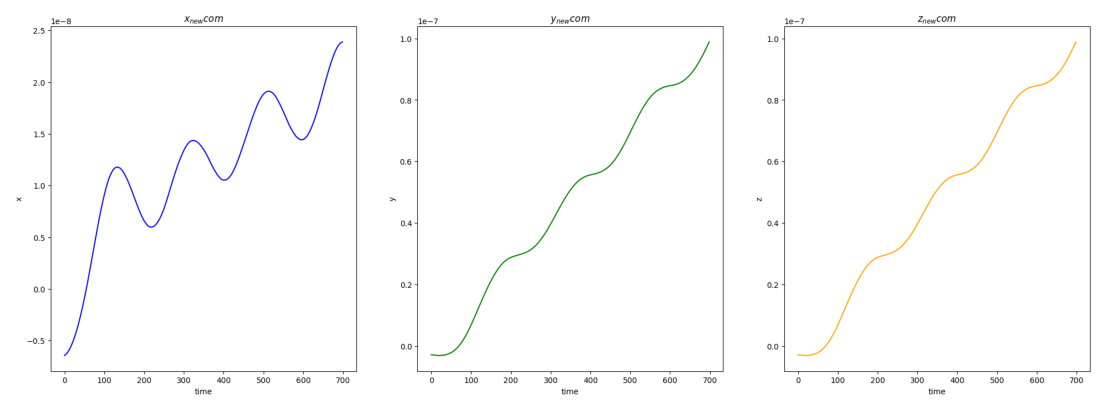

In [81]:
img = mpimg.imread('immagini/coordinates_new.png')
plt.figure(figsize=(14, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

then i calculated the velocity evolution of the center of mass of the destribution as:

\
$v_{x}com=\frac{x_{sim}com}{\Delta t}$

$v_{y}com=\frac{y_{sim}com}{\Delta t}$

$v_{z}com=\frac{z_{sim}com}{\Delta t}$


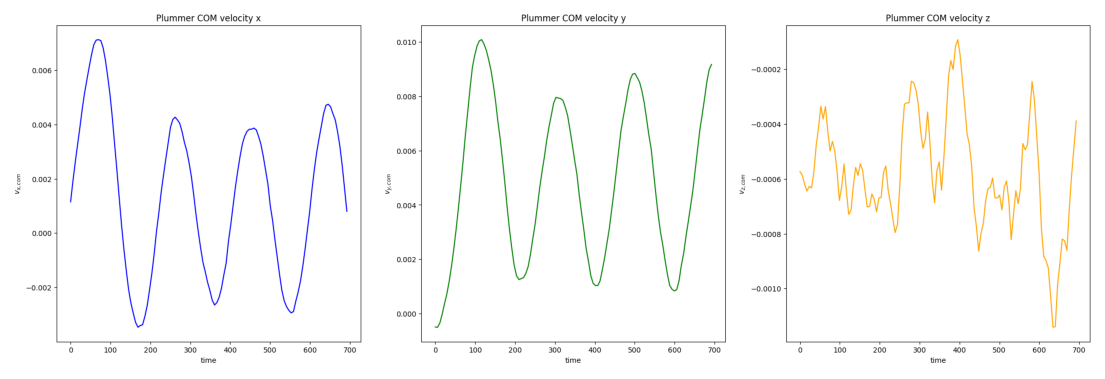

In [83]:
img = mpimg.imread('immagini/v_com.png')
plt.figure(figsize=(14, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

**perturber radial evolution**

I made a qualitative plot of the perturber radial evolution to track its evolution

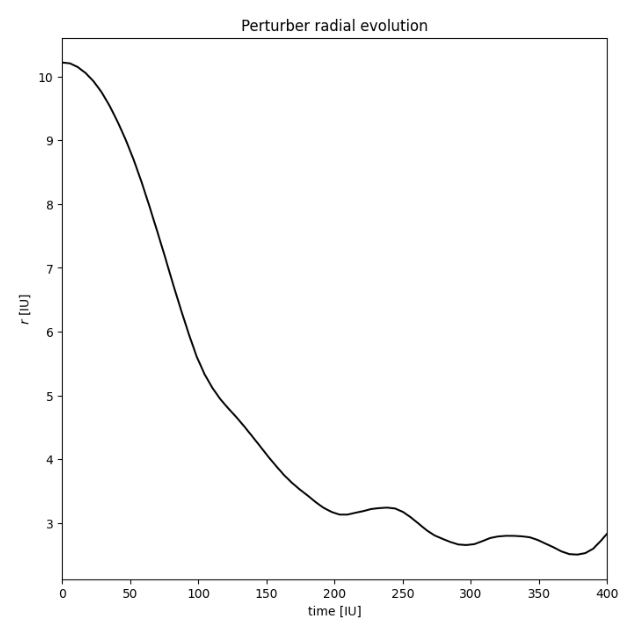

In [88]:
img = mpimg.imread('immagini/pert_ev.png')
plt.figure(figsize=(14, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

**coordinates evolution**

the following image rapresents the motion of the perturber around the com of the plummer

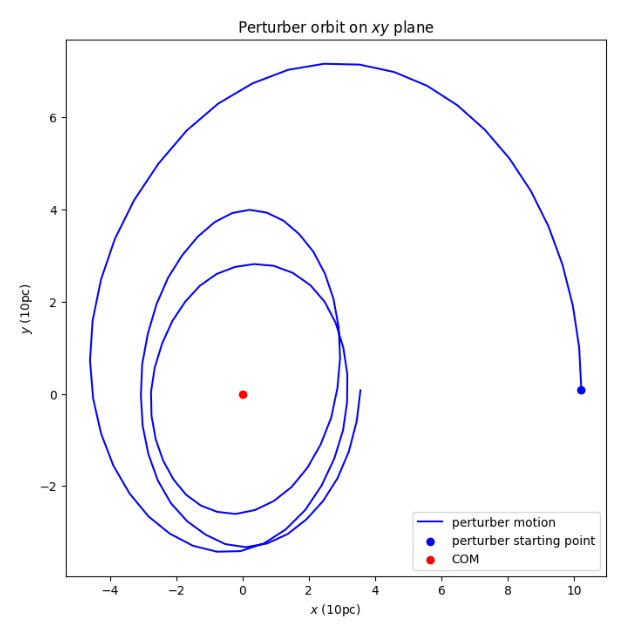

In [139]:
img = mpimg.imread('immagini/r_ev.png')
plt.figure(figsize=(14, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

## angular momentum of the perturber 

At this point, I calculated the angular momentum both the destribution and the perturber by applying the definition of angular momentum:

\
$L_{Plummer}[i,j] = masses[i,j]*np.cross(pos_{Plummer}[j,i],vel_{Plummer}[j,i])$

\
where $pos_{Plummer}$ is the transposed matrix which contains the positions of all the particles. Similarly $vel_{Plummer}$ is the matrix conteining the velocity of the particles.

In the same way i calculated the evolution of the angular momentum of the perturber, by applying once again the definition:

\
$L_{perturber}[i] = M_{perturber}*np.cross(pos_{pert}[i],vel_{pert}[i])$

in this case "i" rapresents the index of the perturber

## RESULTS

**perturber evolution**

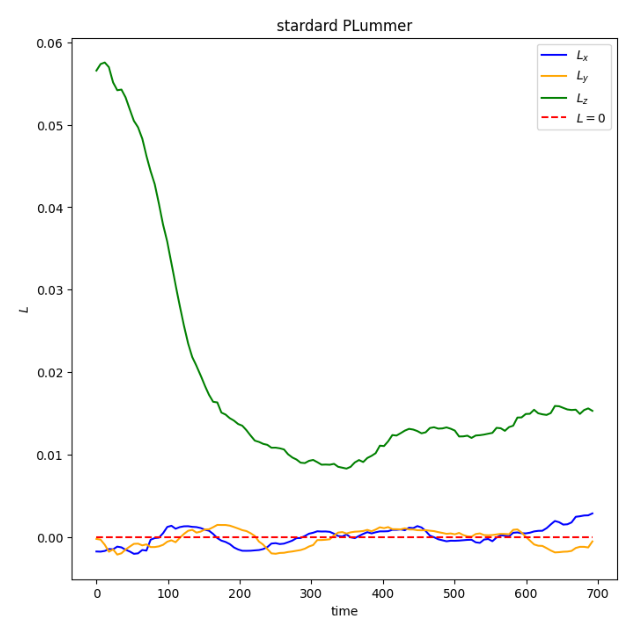

In [91]:
img = mpimg.imread('immagini/pert_L.png')
plt.figure(figsize=(14, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

**plummer evolution**

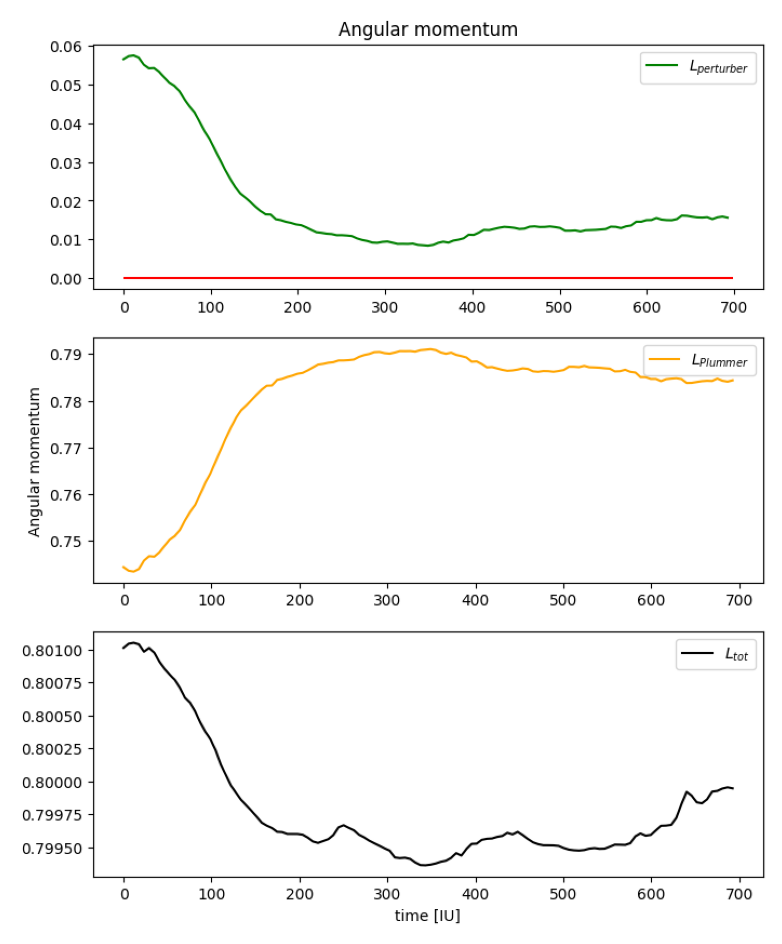

In [96]:
img = mpimg.imread('immagini/l.png')
plt.figure(figsize=(18, 12))
plt.imshow(img)
plt.axis('off')
plt.show()

## Energy

I wanted to make sure that the system was bound, so the total energy of the system has to be $E_{TOT}=T+U<0$

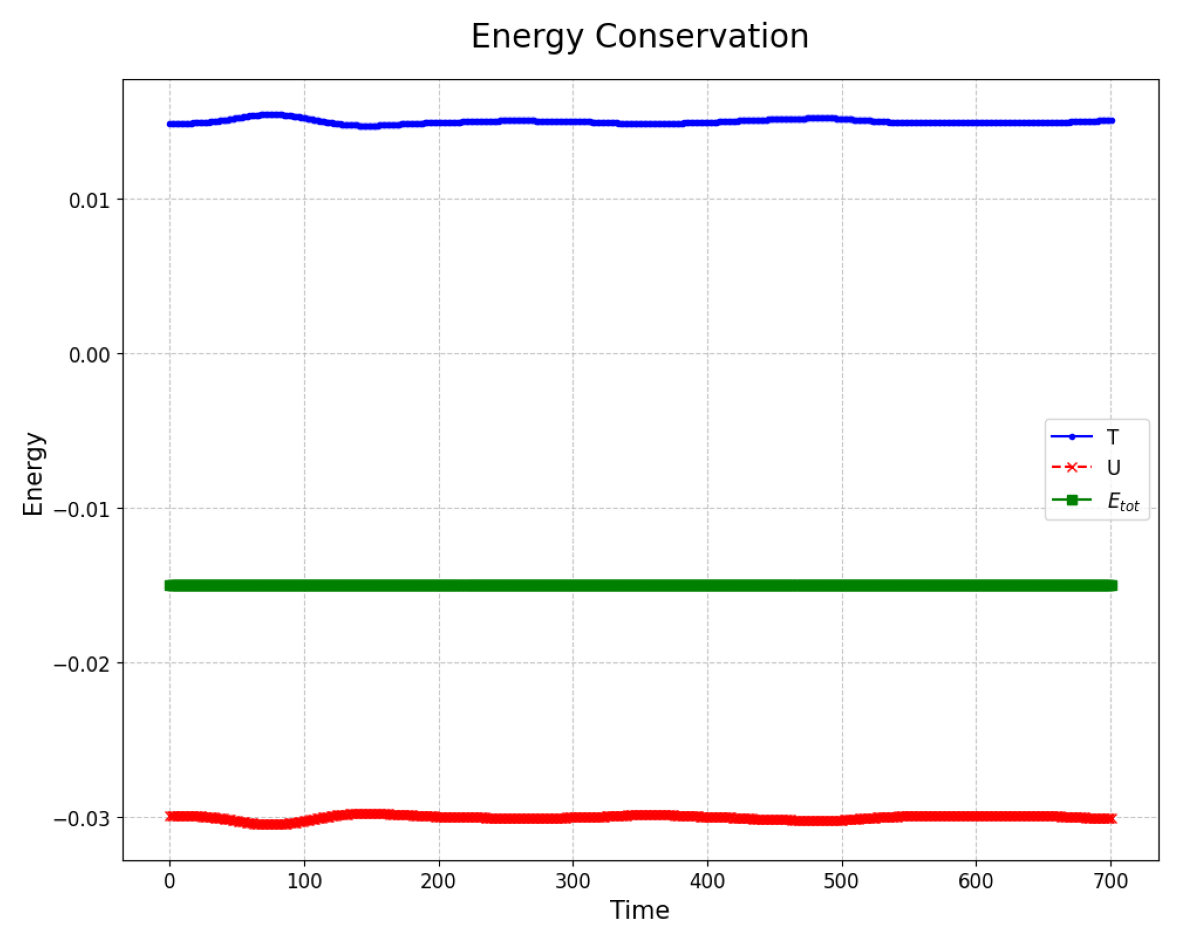

In [97]:
img = mpimg.imread('immagini/en.png')
plt.figure(figsize=(18, 12))
plt.imshow(img)
plt.axis('off')
plt.show()

# RESULTS 

## Simulation 1

- N =10000
- X_perturber=0.8 scale radius
- M_perturber=0.1 $M$

### Final result - Perturber evolution - XY plan
<img src='10k-8a-0.1M/orbit_ev1.pdf' align="center" width="1500px"/>

### Final result - perturber evolution
<img src='10k-8a-0.1M/pert_ev1.pdf' align="center" width="1500px"/>

### Final result - Angular momentum - Simulation 1
<img src='10k-8a-0.1M/grafico.pdf' align="center" width="1500px"/>

### Comparison amoung the 3 configurations - Simulation 1
<img src='10k-8a-0.1M/totang.pdf' align="center" width="1500px"/>

## Simulation 2:
- N:10000
- X_perturber= 1 scale radius
- M_perturber=0.1 $M$

### Final result - Perturber evolution - XY plan
<img src='10k-10a-0.1M/orbit_ev2.pdf' align="center" width="1500px"/>

### Final result - perturber evolution
<img src='10k-10a-0.1M/pert_ev2.pdf' align="center" width="1500px"/>

### Final result - Angular momentum - Simulation 2
<img src='10k-10a-0.1m/grafico.pdf' align="center" width="1500px"/>

### Comparison amoung the 3 configurations - Simulation 2
<img src='10k-10a-0.1m/totang.pdf' align="center" width="1500px"/>

## Simulation 3:
- N:20000
- X_perturber= 1 scale radius
- M_perturber=0.1 $M$

### Final result - Perturber evolution - XY plan
<img src='20k-8a-0.1M/orbit_ev3.pdf' align="center" width="1500px"/>

### Final result - perturber evolution
<img src='20k-8a-0.1M/pert_ev3.pdf' align="center" width="1500px"/>

### Final result - Angular momentum - Simulation 3
<img src='20k-8a-0.1M/grafico.pdf' align="center" width="1500px"/>

### Comparison amoung the 3 configurations - Simulation 3
<img src='20k-8a-0.1M/totang.pdf' align="center" width="1500px"/>

## Simulation 4:
- N:30000
- X_perturber= 1 scale radius
- M_perturber=0.1 $M$

### Final result - Perturber evolution - XY plan
<img src='30k-8a-0.1M/orbit_ev4.pdf' align="center" width="1500px"/>

### Final result - perturber evolution
<img src='30k-8a-0.1M/pert_ev4.pdf' align="center" width="1500px"/>

### final results-Angular momentum
<img src='30k-8a-0.1M/grafico.pdf' align="center" width="1500px"/>

### comparison amoung the 3 configurations
<img src='30k-8a-0.1M/totang.pdf' align="center" width="1500px"/>